# 1 Preprocessing Functions

## This workbook

* This workbook runs the preprocessing for the recordings from the ANT, BEL and DUB datasets from The Sound Atlas of Irish English (Hickey, 2004)
* Imports sound files from the SAIE dataset by recording, the full file of speech data from each speaker, in .WAV format, from SAIE
* Run and save separate workbooks for Dublin (DUB) and merged Belfast-region (ANTBEL) datasets

* librosa records the sampling rate, all 22,050 Hz in SAIE data, 
* Using regular expressions, the county, town, age, gender are extracted for each recording

* With librosa calculates the MFCC, MFCC_delta and MFCC_delta_2 from the sound data
* Adds the features to a Dataframe which is exported as a .PKL file
* The workbooksaves down the sample data in one-second .WAV files for input in the classification model

* OPTIONAL commented out - graphs all the recordings or all the samples sound waves, power spectrum, MFCC, MFCC_delta and MFCC_delta_2

## Kernel = audio6 
## audio6_requirements.txt is the requirements.txt file


## Updates

* 0_73 Cleanup for submission
* 0_72 Change dataframe export output to pickle format
* 0_71 Output data in HDF format to preserve data structures
* 0_70 Store sample number and sample file names and add them to the dataframe
* 0_69 DER Derry files, 0_69 Antrim and Belfast files, 0_60 DUB for Dublin files
* 0_69 Clean up and check code and data; add exports of samples to WAV files
* 0_68 Sample recordings every SAMPLE_LENGTH seconds.  Add these samples to the dataframe exported along with statistics for the sample alone.  
* 0_67 Added DER Derry data,  Added regex for Windows file formats on Core i5
* 0_66 Added DOW Down data
* 0_65 Added ANT Antrim and BEL Belfast sound data, added rational expression to deal with the urban/rural and size codes in the SAIE filenames
* 0_63,4 add conversion of MP3 to WAV, add extraction of county, town, gender and age codes
* 0_6 add code for dataframe definition and export
* 0_5 added graphing of spectrogram
* 0_4 loaded Dublin full-text data

## Record run time and date, saved down on the output data file names

In [1]:
from datetime import datetime

# Get the current system date and time
now = datetime.now()

# Format the date and time as yyyymmdd_hhmm
formatted_date_time = now.strftime("%Y%m%d_%H%M")

# Save it to a variable
date_time_variable = formatted_date_time

# Print the variable to verify
print(date_time_variable)

20240812_0026


In [2]:
import os

In [3]:
CWD=os.getcwd()
print(CWD)

C:\Users\GGMachines_Gaming\Documents\voxpop\clustering


## Inputs - recording data directory, usually subdirectory DUB to CWD

In [4]:
# !pip install librosa # if needed

In [5]:
import librosa
librosa.__version__ 
# librosa used for tis was 0.10.2.post1

'0.10.2.post1'

In [6]:
import matplotlib
import librosa.display

In [7]:
import numpy as np 
np.__version__

'1.26.4'

In [8]:
import pandas as pd
pd.__version__

'2.2.2'

In [9]:
import soundfile as sf

In [10]:
import math

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("seaborn")
import glob
import IPython
from IPython.display import Audio
import re
import csv

In [12]:
from pydub import AudioSegment
import soundfile as sf
import os

C:\Users\GGMachines_Gaming\.conda\envs\audio6\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [13]:
import tables

In [14]:
filenames=[]
sr=[]
dur=[]
y=[]
names=[]

# Set Global Variables

## Set DIR_PATH for inputing recordings files

In [26]:
#DIR_PATH=r'/Users/peternolan/Documents/voxpop/notebooks/DUB/*.wav'
#DIR_PATH=r'/Users/peternolan/Documents/voxpop/notebooks/NI/DER/*.wav'
#DIR_PATH=r"C:\Users\peter\VoxPop\DER\*.wav" # Derry input files
#DIR_PATH=r"C:\Users\peter\VoxPop\ANT\*.wav" # Antrim input files
#DIR_PATH=r"C:\Users\peter\VoxPop\DUB\*.wav" # Dublin input files

#DIR_PATH='C:\\Users\\GGMachines_Gaming\\Documents\\DUB\\*.wav'

DIR_PATH='C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\*.wav'

## Set DATASET_NAME of target data

In [16]:
#DATASET_NAME = "ANT" # Antrim (ANT) and Belfast (BEL)voice recordings datasets

DATASET_NAME = "DUB" # Dublin (DUB) voice recordings datasets

In [17]:
os.getcwd()

'C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\clustering'

In [1]:
#SAMPLE_OUTPUT_DIRECTORY="C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\sample_output_directory\\"
SAMPLE_OUTPUT_DIRECTORY="C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\sample_output_directory\\"

In [21]:
os.chdir(SAMPLE_OUTPUT_DIRECTORY)
os.getcwd()

'C:\\Users\\GGMachines_Gaming\\Documents\\voxpop\\sample_output_directory3'

## Set target SAMPLE_LENGTH of sample output files for the models

In [22]:
SAMPLE_LENGTH=1 # seconds

In [23]:
DIR_PATH

'C:\\Users\\GGMachines_Gaming\\Documents\\DUB\\*.wav'

In [ ]:
RESAMPLE_RATE = 22050

In [27]:
res = glob.glob(DIR_PATH)
for filename in res:
    filenames.append(filename)

In [28]:
len(filenames)

167

In [47]:
def sample_duration(filename):
    d=(librosa.get_duration(path=filename))
    d=int(d*100)/100
    return d

In [30]:
def convert_MP3_to_WAV(convertfile):
    print(convertfile)
    convertaudio = AudioSegment.from_mp3(convertfile)
    convertaudio.export("convertfile.wav", format="wav")
    dur=sample_duration("convertfile.wav")
    y, sr = librosa.load("convertfile.wav",duration=dur)
    return y,sr

In [31]:
filenames

['C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Artane_M_20.wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Artane_M_20_(2).wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Artane_M_20_(3).wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Ballinteer_F_20.wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Ballinteer_F_20_(2).wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Ballinteer_F_20_(3).wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Ballinteer_M_25.wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Beaumont_M_35.wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Blackrock_F_20.wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Blanchard_F_20.wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Blanchard_F_20_(2).wav',
 'C:\\Users\\GGMachines_Gaming\\Documents\\VoxPop\\DUB\\DUB_Blanchard_F_20_(3).wav',
 'C:\\User

In [32]:
for i in filenames: 
#    names.append(re.search(r'/([^/]+)\.wav$',i).group(1)) MacOs version
    names.append(re.search(r'([^\\]+).wav$',i).group(1)) #Windows version


In [33]:
len(names)

167

In [34]:
names

['DUB_Artane_M_20',
 'DUB_Artane_M_20_(2)',
 'DUB_Artane_M_20_(3)',
 'DUB_Ballinteer_F_20',
 'DUB_Ballinteer_F_20_(2)',
 'DUB_Ballinteer_F_20_(3)',
 'DUB_Ballinteer_M_25',
 'DUB_Beaumont_M_35',
 'DUB_Blackrock_F_20',
 'DUB_Blanchard_F_20',
 'DUB_Blanchard_F_20_(2)',
 'DUB_Blanchard_F_20_(3)',
 'DUB_Blanchard_F_20_(4)',
 'DUB_Blanchard_F_20_(5)',
 'DUB_Blanchard_M_20',
 'DUB_Blanchard_M_20_(2)',
 'DUB_Blanchard_M_20_(3)',
 'DUB_Blanchard_M_20_(4)',
 'DUB_Bray_F_20',
 'DUB_Bray_F_20_(2)',
 'DUB_Bray_F_35',
 'DUB_Bray_M_20',
 'DUB_Bray_M_20_(2)',
 'DUB_Bray_M_20_(3)',
 'DUB_Bray_M_20_(4)',
 'DUB_Cabinteely_F_20',
 'DUB_Cabinteely_F_20_(2)',
 'DUB_Cabinteely_F_20_(3)',
 'DUB_Cabinteely_M_20',
 'DUB_Cabra_F_20',
 'DUB_Cabra_M_20',
 'DUB_Castleknock_F_20',
 'DUB_Castleknock_M_20',
 'DUB_Castleknock_M_20_(2)',
 'DUB_Castleknock_M_20_(3)',
 'DUB_Churchtown_F_20',
 'DUB_Churchtown_F_20_(2)',
 'DUB_Churchtown_F_20_(3)',
 'DUB_Clondalkin_M_20',
 'DUB_Clonskea_F_20',
 'DUB_Clonskea_F_20_(2)',
 'DU

In [35]:
counties=[]
towns=[]
genders=[]
urbanrurals=[]
sizes=[]
ages=[]  

In [36]:
pattern1 = r'(?P<county>[a-zA-Z]+)_(?P<town>[a-zA-Z-]+)_(?P<gender>[MF])_(?P<age>\d+)'
pattern2 = r'(?P<county>[a-zA-Z]+)_(?P<town>[a-zA-Z-]+)_(?P<urbanrural>[UR])(?P<size>[12])_(?P<gender>[MF])_(?P<age>\d+)'

h=0

# Loop through the strings and extract the variables
for string in names:
    match1 = re.match(pattern1, string)
    match2 = re.match(pattern2, string)

    print(str(h)+" "+string)

    if match1:
        county = match1.group('county')
        counties.append(county)
        
        town = match1.group('town')
        towns.append(town)
        
        urbanrurals.append(None)
        sizes.append(None)
        
        gender = match1.group('gender') 
        genders.append(gender)
        
        age = int(match1.group('age'))
        ages.append(age)
        
    elif match2:
        county = match2.group('county')
        counties.append(county)
        
        town = match2.group('town')
        towns.append(town)
        
        urbanrural = match2.group('urbanrural')  # 'U' or 'R'
        urbanrurals.append(urbanrural)
        
        size=match2.group('size')
        sizes.append(size)
        
        gender = match2.group('gender')  # '1' or '2'
        genders.append(gender)
        
        age = int(match2.group('age'))
        ages.append(age)
        
   #     print(county,town,gender,age)
   #     print("\n")
    h+=1


0 DUB_Artane_M_20
1 DUB_Artane_M_20_(2)
2 DUB_Artane_M_20_(3)
3 DUB_Ballinteer_F_20
4 DUB_Ballinteer_F_20_(2)
5 DUB_Ballinteer_F_20_(3)
6 DUB_Ballinteer_M_25
7 DUB_Beaumont_M_35
8 DUB_Blackrock_F_20
9 DUB_Blanchard_F_20
10 DUB_Blanchard_F_20_(2)
11 DUB_Blanchard_F_20_(3)
12 DUB_Blanchard_F_20_(4)
13 DUB_Blanchard_F_20_(5)
14 DUB_Blanchard_M_20
15 DUB_Blanchard_M_20_(2)
16 DUB_Blanchard_M_20_(3)
17 DUB_Blanchard_M_20_(4)
18 DUB_Bray_F_20
19 DUB_Bray_F_20_(2)
20 DUB_Bray_F_35
21 DUB_Bray_M_20
22 DUB_Bray_M_20_(2)
23 DUB_Bray_M_20_(3)
24 DUB_Bray_M_20_(4)
25 DUB_Cabinteely_F_20
26 DUB_Cabinteely_F_20_(2)
27 DUB_Cabinteely_F_20_(3)
28 DUB_Cabinteely_M_20
29 DUB_Cabra_F_20
30 DUB_Cabra_M_20
31 DUB_Castleknock_F_20
32 DUB_Castleknock_M_20
33 DUB_Castleknock_M_20_(2)
34 DUB_Castleknock_M_20_(3)
35 DUB_Churchtown_F_20
36 DUB_Churchtown_F_20_(2)
37 DUB_Churchtown_F_20_(3)
38 DUB_Clondalkin_M_20
39 DUB_Clonskea_F_20
40 DUB_Clonskea_F_20_(2)
41 DUB_Clonskea_F_20_(3)
42 DUB_Clonskea_F_20_(4)
43 DU

In [37]:
counties

['DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',
 'DUB',


In [38]:
names

['DUB_Artane_M_20',
 'DUB_Artane_M_20_(2)',
 'DUB_Artane_M_20_(3)',
 'DUB_Ballinteer_F_20',
 'DUB_Ballinteer_F_20_(2)',
 'DUB_Ballinteer_F_20_(3)',
 'DUB_Ballinteer_M_25',
 'DUB_Beaumont_M_35',
 'DUB_Blackrock_F_20',
 'DUB_Blanchard_F_20',
 'DUB_Blanchard_F_20_(2)',
 'DUB_Blanchard_F_20_(3)',
 'DUB_Blanchard_F_20_(4)',
 'DUB_Blanchard_F_20_(5)',
 'DUB_Blanchard_M_20',
 'DUB_Blanchard_M_20_(2)',
 'DUB_Blanchard_M_20_(3)',
 'DUB_Blanchard_M_20_(4)',
 'DUB_Bray_F_20',
 'DUB_Bray_F_20_(2)',
 'DUB_Bray_F_35',
 'DUB_Bray_M_20',
 'DUB_Bray_M_20_(2)',
 'DUB_Bray_M_20_(3)',
 'DUB_Bray_M_20_(4)',
 'DUB_Cabinteely_F_20',
 'DUB_Cabinteely_F_20_(2)',
 'DUB_Cabinteely_F_20_(3)',
 'DUB_Cabinteely_M_20',
 'DUB_Cabra_F_20',
 'DUB_Cabra_M_20',
 'DUB_Castleknock_F_20',
 'DUB_Castleknock_M_20',
 'DUB_Castleknock_M_20_(2)',
 'DUB_Castleknock_M_20_(3)',
 'DUB_Churchtown_F_20',
 'DUB_Churchtown_F_20_(2)',
 'DUB_Churchtown_F_20_(3)',
 'DUB_Clondalkin_M_20',
 'DUB_Clonskea_F_20',
 'DUB_Clonskea_F_20_(2)',
 'DU

In [39]:
towns

['Artane',
 'Artane',
 'Artane',
 'Ballinteer',
 'Ballinteer',
 'Ballinteer',
 'Ballinteer',
 'Beaumont',
 'Blackrock',
 'Blanchard',
 'Blanchard',
 'Blanchard',
 'Blanchard',
 'Blanchard',
 'Blanchard',
 'Blanchard',
 'Blanchard',
 'Blanchard',
 'Bray',
 'Bray',
 'Bray',
 'Bray',
 'Bray',
 'Bray',
 'Bray',
 'Cabinteely',
 'Cabinteely',
 'Cabinteely',
 'Cabinteely',
 'Cabra',
 'Cabra',
 'Castleknock',
 'Castleknock',
 'Castleknock',
 'Castleknock',
 'Churchtown',
 'Churchtown',
 'Churchtown',
 'Clondalkin',
 'Clonskea',
 'Clonskea',
 'Clonskea',
 'Clonskea',
 'Clonskea',
 'Clontarf',
 'Clontarf',
 'Clontarf',
 'Clontarf',
 'Clontarf',
 'Clontarf',
 'Crumlin',
 'Dalkey',
 'Dalkey',
 'DeansGrange',
 'DeansGrange',
 'Donnybrook',
 'Donnybrook',
 'Dundrum',
 'Dundrum',
 'Dundrum',
 'Dundrum',
 'Dunleary',
 'Dunleary',
 'Dunleary',
 'Dunleary',
 'Dunleary',
 'Dunleary',
 'Dunleary',
 'EastWall',
 'Finglas',
 'Finglas',
 'Foxrock',
 'Foxrock',
 'Goatstown',
 'Goatstown',
 'HaroldsCross',
 'H

In [40]:
urbanrurals

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [41]:
genders

['M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'F'

In [42]:
sizes

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [43]:
ages

[20,
 20,
 20,
 20,
 20,
 20,
 25,
 35,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 35,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 50,
 20,
 40,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 30,
 20,
 35,
 25,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 25,
 20,
 20,
 20,
 20,
 20,
 30,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 30,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 50,
 20,
 20,
 45,
 15,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 15,
 15,
 35,
 15,
 15,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 40,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 30,
 30,
 20,
 20]

In [44]:
print(len(counties))
print(len(towns))
print(len(urbanrurals))
print(len(sizes))
print(len(genders))
print(len(ages))

167
167
167
167
167
167


## Check if the file returns zero length data when processed as .WAV, in which case, it is an .MP3 and needs conversion

In [50]:

h=0
for filename in filenames:
    file_duration=sample_duration(filename)
    file_y, file_sr= librosa.load(filename,duration=sample_duration(filename))
    
    if len(file_y)==0:
        print("MP3 converted to WAV\n")
        print(str(h))
        file_y, file_sr=convert_MP3_to_WAV(filename)
         
    resample_y=librosa.resample(file_y, orig_sr=file_sr, target_sr=RESAMPLE_RATE)
    
    y.append(resample_y)
    sr.append(RESAMPLE_RATE)
    dur.append(file_duration)
    h+=1

## Number of recording files in the dataset 

In [51]:
len(y)

167

In [52]:
len(filenames)

167

In [53]:
y[0].shape

(1799942,)

In [54]:
# print filenames

for i in range(0,len(filenames)):
    print(str(i)+" "+filenames[i])
    #print(y[i][0])
   #IPython.display.display(Audio(data=y[i], rate=sr[i]))

0 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Artane_M_20.wav
1 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Artane_M_20_(2).wav
2 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Artane_M_20_(3).wav
3 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Ballinteer_F_20.wav
4 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Ballinteer_F_20_(2).wav
5 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Ballinteer_F_20_(3).wav
6 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Ballinteer_M_25.wav
7 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Beaumont_M_35.wav
8 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Blackrock_F_20.wav
9 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Blanchard_F_20.wav
10 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Blanchard_F_20_(2).wav
11 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Blanchard_F_20_(3).wav
12 C:\Users\GGMachines_Gaming\Documents\VoxPop\DUB\DUB_Blanchard_F_20_(4).wav
13 C:\Users\GGMachines_Gam

In [48]:
'''h=0
for i,j,k in zip(filenames,y,sr):
    print(str(h)+i)
    IPython.display.display(Audio(data=i, rate=j))
    h+=1
'''

'h=0\nfor i,j,k in zip(filenames,y,sr):\n    print(str(h)+i)\n    IPython.display.display(Audio(data=i, rate=j))\n    h+=1\n'

In [55]:
#Check filens are all successfully converted to WAV
h=-1
for i,j,k in zip(y,sr,names):
    h+=1
    if len(i)==0: 
        print("Broken: "+str(k))
    else:
        print(str(h)+" OK: "+str(k))
        continue

0 OK: DUB_Artane_M_20
1 OK: DUB_Artane_M_20_(2)
2 OK: DUB_Artane_M_20_(3)
3 OK: DUB_Ballinteer_F_20
4 OK: DUB_Ballinteer_F_20_(2)
5 OK: DUB_Ballinteer_F_20_(3)
6 OK: DUB_Ballinteer_M_25
7 OK: DUB_Beaumont_M_35
8 OK: DUB_Blackrock_F_20
9 OK: DUB_Blanchard_F_20
10 OK: DUB_Blanchard_F_20_(2)
11 OK: DUB_Blanchard_F_20_(3)
12 OK: DUB_Blanchard_F_20_(4)
13 OK: DUB_Blanchard_F_20_(5)
14 OK: DUB_Blanchard_M_20
15 OK: DUB_Blanchard_M_20_(2)
16 OK: DUB_Blanchard_M_20_(3)
17 OK: DUB_Blanchard_M_20_(4)
18 OK: DUB_Bray_F_20
19 OK: DUB_Bray_F_20_(2)
20 OK: DUB_Bray_F_35
21 OK: DUB_Bray_M_20
22 OK: DUB_Bray_M_20_(2)
23 OK: DUB_Bray_M_20_(3)
24 OK: DUB_Bray_M_20_(4)
25 OK: DUB_Cabinteely_F_20
26 OK: DUB_Cabinteely_F_20_(2)
27 OK: DUB_Cabinteely_F_20_(3)
28 OK: DUB_Cabinteely_M_20
29 OK: DUB_Cabra_F_20
30 OK: DUB_Cabra_M_20
31 OK: DUB_Castleknock_F_20
32 OK: DUB_Castleknock_M_20
33 OK: DUB_Castleknock_M_20_(2)
34 OK: DUB_Castleknock_M_20_(3)
35 OK: DUB_Churchtown_F_20
36 OK: DUB_Churchtown_F_20_(2)
37 

In [56]:
samples=[]

In [57]:
len(y)

167

## Create samples from each recording file

In [58]:
# Create samples from each recording file
h=0
for j in y:
  
    num_samples=math.floor(len(j)/(sr[h]*SAMPLE_LENGTH))
    #print(h,names[h])
    sample=[]
    
    for i in range(0,num_samples):
        sample_start=i*sr[0]*SAMPLE_LENGTH
        sample_end=(i+1)*sr[0]*SAMPLE_LENGTH 
        sample.append(j[sample_start:sample_end])
        
        #if len(sample.size==0: 
        #    sample=new_sample
        #else: 
        #    sample=np.append(sample,[new_sample],axis=0)
        #print(i,sample_start/sr[h],sample_end/sr[h])
    h+=1
    samples.append(sample)


In [59]:
len(samples)

167

In [60]:
samples[0][0].shape

(22050,)

## Show librosa sound wave from a sample file 

## File name 

## Print graph sound wave and MFCC features from each speaker full recording
## Not needed for the data analysis and the features are calculated by sample, not by recording

In [8]:
'''
h=0
for i,j,k in zip(y,sr,names):
    print(h)
    #plt.subplot(len(y),1,h)
    librosa.display.waveshow(y=i, sr=j, label=k,color='b')
    plt.legend()
    plt.show()
    h+=1

'''


"\nh=0\nfor i,j,k in zip(y,sr,names):\n    print(h)\n    #plt.subplot(len(y),1,h)\n    librosa.display.waveshow(y=i, sr=j, label=k,color='b')\n    plt.legend()\n    plt.show()\n    h+=1\n\n"

In [96]:
'''
mfccs = librosa.feature.mfcc(y=samples[0][0], sr=sr[0], n_mfcc=30)
print(mfccs.shape)

plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, sr=sr[0], x_axis='time',y_axis="mel")
plt.show()
'''

'\nmfccs = librosa.feature.mfcc(y=samples[0][0], sr=sr[0], n_mfcc=30)\nprint(mfccs.shape)\n\nplt.figure(figsize=(10, 5))\nlibrosa.display.specshow(mfccs, sr=sr[0], x_axis=\'time\',y_axis="mel")\nplt.show()\n'

In [14]:
'''
Ydb=[]
'''

'\nYdb=[]\n'

In [12]:
'''
# graph power for every single input file 
h=0
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    Y=librosa.stft(i)
    Ydb.append(librosa.amplitude_to_db(abs(Y)))
    librosa.display.specshow(Ydb[-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    print(str(h)+" "+k)
    plt.title(k)
    plt.figure(figsize=(7, 2.5))
    plt.show()
    h+=1
'''

'\n# graph power for every single input file \nh=0\nfor i,j,k in zip(y,sr,names):\n    #plt.subplot(len(i),1,h)\n    Y=librosa.stft(i)\n    Ydb.append(librosa.amplitude_to_db(abs(Y)))\n    librosa.display.specshow(Ydb[-1], sr=j, x_axis="time", y_axis="mel")\n    plt.colorbar()\n    print(str(h)+" "+k)\n    plt.title(k)\n    plt.figure(figsize=(7, 2.5))\n    plt.show()\n    h+=1\n'

In [ ]:
'''
len(Ydb)
'''

In [ ]:
'''
Ydb[0].shape
'''

In [ ]:
"""
Y = librosa.stft(y[0])
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr[0], x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()    
""" 

## Calculate Features by Sample

In [63]:
Ydb=[]
mfcc=[]
mfcc_delta=[]
mfcc_delta_2=[]
sample_file_names=[]

In [64]:
#Calculate features for each sample by iteration through the samples; add each to a master list
h=0
for i in samples:
    for j in i:
        Y=librosa.stft(j)
        Ydb.append(librosa.amplitude_to_db(abs(Y)))
        mfcc.append(librosa.feature.mfcc(y=j, sr=sr[h]))
        mfcc_delta.append(librosa.feature.delta(mfcc[-1]))
        mfcc_delta_2.append(librosa.feature.delta(mfcc[-1], order=2))

    h+=1        

In [65]:
print(len(Ydb))
print(Ydb[0].shape)

15100
(1025, 44)


### Iterate through and save the samples

In [66]:
# iterate through the recordings and save them 

h=0
for i in range(0,len(samples)):
    for j in range(0,len(samples[i])):
        sample_file_names.append(names[i]+"_Rec_"+str(i)+"_Sample_"+str(j)+".wav")
        #print(sample_file_names[h])
        sf.write(SAMPLE_OUTPUT_DIRECTORY+sample_file_names[h], samples[i][j], sr[i], subtype='PCM_24')
        h+=1


In [63]:
'''
# Calculate the features by recording, iterating through the recordings
for i,j in zip(samples,sr):
    mfcc.append(librosa.feature.mfcc(y=i, sr=j))
    mfcc_delta.append(librosa.feature.delta(mfcc[-1]))
    mfcc_delta_2.append(librosa.feature.delta(mfcc[-1], order=2))
'''

'\n# Calculate the features by recording, iterating through the recordings\nfor i,j in zip(samples,sr):\n    mfcc.append(librosa.feature.mfcc(y=i, sr=j))\n    mfcc_delta.append(librosa.feature.delta(mfcc[-1]))\n    mfcc_delta_2.append(librosa.feature.delta(mfcc[-1], order=2))\n'

In [67]:
# check the lengths of the features of all the samples
print(len(Ydb))
print(len(mfcc))
print(len(mfcc_delta))
print(len(mfcc_delta_2))
print(len(Ydb))
print(len(sample_file_names))

15100
15100
15100
15100
15100
15100


## Graph features by recording

In [68]:
'''
# Graph the feature for each recording
h=1
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    #Y=librosa.stft(i)
    #Ydb.append(librosa.amplitude_to_db(abs(Y)))
    print(str(h)+": "+k)
    librosa.display.specshow(mfcc[h-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    plt.title(k+" "+r'MFCC')
    plt.figure(figsize=(14, 5))
    plt.show()
    h+=1

'''

'\n# Graph the feature for each recording\nh=1\nfor i,j,k in zip(y,sr,names):\n    #plt.subplot(len(i),1,h)\n    #Y=librosa.stft(i)\n    #Ydb.append(librosa.amplitude_to_db(abs(Y)))\n    print(str(h)+": "+k)\n    librosa.display.specshow(mfcc[h-1], sr=j, x_axis="time", y_axis="mel")\n    plt.colorbar()\n    plt.title(k+" "+r\'MFCC\')\n    plt.figure(figsize=(14, 5))\n    plt.show()\n    h+=1\n\n'

In [69]:
'''
# Graph the feature for each recording
h=1
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    #Y=librosa.stft(i)
    #Ydb.append(librosa.amplitude_to_db(abs(Y)))
    librosa.display.specshow(mfcc_delta[h-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    print(str(h)+": "+k)
    plt.title(k+" "+r'MFCC-$\Delta$')
    plt.figure(figsize=(14, 5))
    plt.show()
    h+=1
'''

'\n# Graph the feature for each recording\nh=1\nfor i,j,k in zip(y,sr,names):\n    #plt.subplot(len(i),1,h)\n    #Y=librosa.stft(i)\n    #Ydb.append(librosa.amplitude_to_db(abs(Y)))\n    librosa.display.specshow(mfcc_delta[h-1], sr=j, x_axis="time", y_axis="mel")\n    plt.colorbar()\n    print(str(h)+": "+k)\n    plt.title(k+" "+r\'MFCC-$\\Delta$\')\n    plt.figure(figsize=(14, 5))\n    plt.show()\n    h+=1\n'

In [70]:
'''
# Graph the feature for each recording
h=1
for i,j,k in zip(y,sr,names):
    #plt.subplot(len(i),1,h)
    Y=librosa.stft(i)
    #Ydb.append(librosa.amplitude_to_db(abs(Y)))
    librosa.display.specshow(mfcc_delta_2[h-1], sr=j, x_axis="time", y_axis="mel")
    plt.colorbar()
    print(str(h)+": "+k)
    plt.title(k+" "+r'MFCC-$\Delta^2$')
    plt.figure(figsize=(14, 5))
    plt.show()
    h+=1
'''


'\n# Graph the feature for each recording\nh=1\nfor i,j,k in zip(y,sr,names):\n    #plt.subplot(len(i),1,h)\n    Y=librosa.stft(i)\n    #Ydb.append(librosa.amplitude_to_db(abs(Y)))\n    librosa.display.specshow(mfcc_delta_2[h-1], sr=j, x_axis="time", y_axis="mel")\n    plt.colorbar()\n    print(str(h)+": "+k)\n    plt.title(k+" "+r\'MFCC-$\\Delta^2$\')\n    plt.figure(figsize=(14, 5))\n    plt.show()\n    h+=1\n'

## Define and export the DataFrame of Samples and their data and metadata

In [65]:
print(len(filenames))
print(len(names))
print(len(dur))
print(len(y))
print(len(sr))
print(len(Ydb))
print(len(mfcc))
print(len(mfcc_delta))
print(len(mfcc_delta_2))

167
167
167
167
167
15100
15100
15100
15100


In [72]:
df_columns=[
    "filenames~","names","counties","towns","urbanrural","size","genders","ages","dur","recording num","sample num","sample file name","sample","Ydb","sr","mfcc","mfcc_delta","mfcc_delta_2"
]

In [73]:
df=pd.DataFrame(columns=df_columns)

In [74]:
df[80:84]

,filenames~,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2


In [75]:
h=0
for i in range(0,len(samples)):
    for j in range(0,len(samples[i])):
        #insert_row=pd.DataFrame([{"filenames":i,"names":j}])
        insert_row= pd.DataFrame([{"filenames":filenames[i], 
                      "names":names[i],
                      "counties":counties[i],
                      "towns":towns[i],
                      "urbanrural":urbanrurals[i],
                      'size':sizes[i],
                      'genders':genders[i],
                      'ages':ages[i],
                      'dur':dur[i],
                      'recording num':i,
                      'sample num':j,
                      'sample file name':sample_file_names[h],
                      'sample': samples[i][j],
                      'Ydb': Ydb[h],
                      'sr': sr[i],
                      'mfcc': mfcc[h],
                      'mfcc_delta': mfcc_delta[h],
                      'mfcc_delta_2': mfcc_delta_2[h]}])
        df = pd.concat([df,insert_row],ignore_index=True)
        h+=1

C:\Users\GGMachines_Gaming\AppData\Local\Temp\ipykernel_21332\4282055374.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,insert_row],ignore_index=True)


In [76]:
#df['sample'] = df['sample'].apply(lambda x: ','.join(map(str, x)))

In [77]:
df.shape

(15100, 19)

In [73]:
df[80:84]

,filenames,names,counties,towns,urbanrural,size,genders,ages,dur,recording num,sample num,sample file name,sample,Ydb,sr,mfcc,mfcc_delta,mfcc_delta_2
80,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20,DUB,Artane,None,None,M,20,81.63,0,80,DUB_Artane_M_20_Rec_0_Sample_80.wav,"[0.016045244, -0.008315919, -0.02204391, -0.03...","[[-12.405441, -23.336725, -18.446842, -29.9625...",22050,"[[-172.02167, -152.49522, -210.45895, -236.481...","[[4.7096677, 4.7096677, 4.7096677, 4.7096677, ...","[[7.1288533, 7.1288533, 7.1288533, 7.1288533, ..."
81,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20_(2),DUB,Artane,None,None,M,20,94.28,1,0,DUB_Artane_M_20_(2)_Rec_1_Sample_0.wav,"[-1.1641532e-10, -9.313226e-10, -4.656613e-09,...","[[-34.74787, -25.812857, -34.74787, -1.5363762...",22050,"[[-465.85907, -291.69635, -234.51353, -209.333...","[[41.190304, 41.190304, 41.190304, 41.190304, ...","[[-20.55139, -20.55139, -20.55139, -20.55139, ..."
82,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20_(2),DUB,Artane,None,None,M,20,94.28,1,1,DUB_Artane_M_20_(2)_Rec_1_Sample_1.wav,"[0.005559768, -0.0043689166, -0.015258972, -0....","[[-27.40541, -27.653982, -38.927185, -23.75767...",22050,"[[-304.5896, -256.64023, -226.20067, -233.5788...","[[14.722461, 14.722461, 14.722461, 14.722461, ...","[[-0.2057181, -0.2057181, -0.2057181, -0.20571..."
83,C:\Users\GGMachines_Gaming\Documents\DUB\DUB_A...,DUB_Artane_M_20_(2),DUB,Artane,None,None,M,20,94.28,1,2,DUB_Artane_M_20_(2)_Rec_1_Sample_2.wav,"[0.015664967, 0.00853162, 0.0015324727, -0.005...","[[-17.89692, -20.57634, -35.879272, -35.879272...",22050,"[[-310.7319, -284.62164, -269.91156, -262.5582...","[[2.846156, 2.846156, 2.846156, 2.846156, 2.84...","[[-3.5868106, -3.5868106, -3.5868106, -3.58681..."


In [78]:
'''
# DataFrame defintion by recording

df=pd.DataFrame(
    "filenames": filenames,
    "names": names,
    "counties": counties,
    "towns": towns,
    "urbanrural": urbanrurals,
    "size": sizes,
    "genders": genders,
    "ages": ages,
    "dur":dur,
    "y":y,
    "Ydb":Ydb,
    "sr":RESAMPLE_RATE,
    "mfcc":mfcc,
    "mfcc_delta":mfcc_delta,
    "mfcc_delta_2":mfcc_delta_2
'''

'\n# DataFrame defintion by recording\n\ndf=pd.DataFrame(\n    "filenames": filenames,\n    "names": names,\n    "counties": counties,\n    "towns": towns,\n    "urbanrural": urbanrurals,\n    "size": sizes,\n    "genders": genders,\n    "ages": ages,\n    "dur":dur,\n    "y":y,\n    "Ydb":Ydb,\n    "sr":RESAMPLE_RATE,\n    "mfcc":mfcc,\n    "mfcc_delta":mfcc_delta,\n    "mfcc_delta_2":mfcc_delta_2\n'

In [79]:
for i,j in enumerate(df.columns):
    print(str(i)+": "+j)

0: filenames~
1: names
2: counties
3: towns
4: urbanrural
5: size
6: genders
7: ages
8: dur
9: recording num
10: sample num
11: sample file name
12: sample
13: Ydb
14: sr
15: mfcc
16: mfcc_delta
17: mfcc_delta_2
18: filenames


In [80]:
print(df.columns[12])
print(df.iloc[0,12])
print(type(df.iloc[0,12]))
print(len(df.iloc[0,12]))

sample
[1.5543122e-15 3.3306691e-15 3.5527137e-15 ... 5.3641959e-03 1.1229521e-02
 4.2106798e-03]
<class 'numpy.ndarray'>
22050


In [81]:
print(df.columns[15])
print(df.iloc[0,15])
print(type(df.iloc[0,15]))
print(len(df.iloc[0,15]))

mfcc
[[-6.55948975e+02 -6.15149475e+02 -3.28689148e+02 -2.42041382e+02
  -2.29819016e+02 -2.30740952e+02 -2.31494736e+02 -2.37771729e+02
  -2.43383575e+02 -2.44239014e+02 -2.46925751e+02 -2.44045013e+02
  -2.47751648e+02 -2.46066315e+02 -2.13540024e+02 -1.73564804e+02
  -1.58268784e+02 -1.35393005e+02 -8.36834335e+01 -6.17032051e+01
  -1.02409706e+02 -1.88199066e+02 -1.56439285e+02 -8.28446732e+01
  -7.13829651e+01 -8.93608780e+01 -1.06577187e+02 -1.34484665e+02
  -1.81219910e+02 -1.96185959e+02 -2.36586304e+02 -3.15856262e+02
  -2.96403931e+02 -2.59500793e+02 -2.45449478e+02 -1.78884460e+02
  -1.26896660e+02 -1.37021210e+02 -1.94928162e+02 -2.90242859e+02
  -3.20228729e+02 -2.86150604e+02 -2.46273132e+02 -2.74499146e+02]
 [ 0.00000000e+00  2.86086273e+01  1.02580528e+02  1.09890656e+02
   1.07779488e+02  1.10245888e+02  1.21057861e+02  1.27328232e+02
   1.28122559e+02  1.35064682e+02  1.31488373e+02  1.22285980e+02
   1.18880005e+02  1.12423599e+02  9.89670258e+01  9.64290237e+01
   1

In [82]:
df['sample'].iloc[0].shape

(22050,)

In [83]:
df['mfcc'].iloc[0].shape 

(20, 44)

In [85]:
# Export the DataFrame to a pickle file for further processing 
df.to_pickle(date_time_variable+"_"+DATASET_NAME+'_features.pkl')

In [83]:
# Check the pickle load if needed 
df2=pd.read_pickle(date_time_variable+"_"+DATASET_NAME+'_features.pkl')

In [86]:
date_time_variable

'20240812_0026'

## Show librosa sound wave from a sample file 

In [109]:
IPython.display.display(Audio(data=samples[0][0], rate=sr[0]))

Name=DUB_Artane_M_20


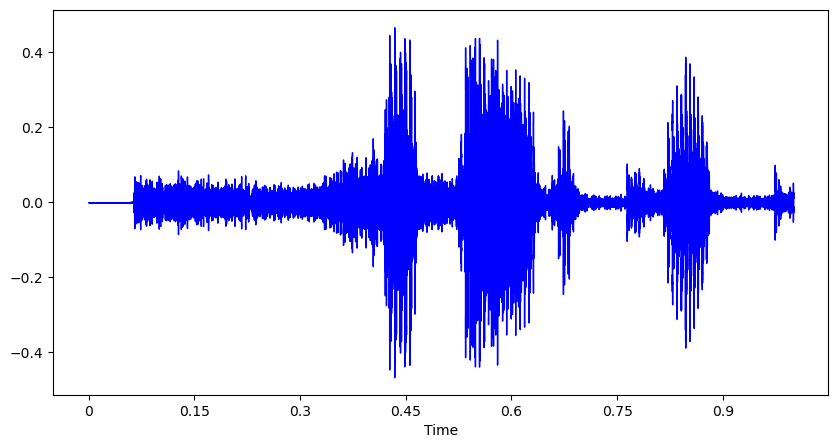

In [110]:
print("Name="+names[0])
plt.figure(figsize=(10, 5))
librosa.display.waveshow(y=y[0][0:22050], sr=sr[0], label=names[0],color='b')

## Display MFCC for the sample

(20, 44)


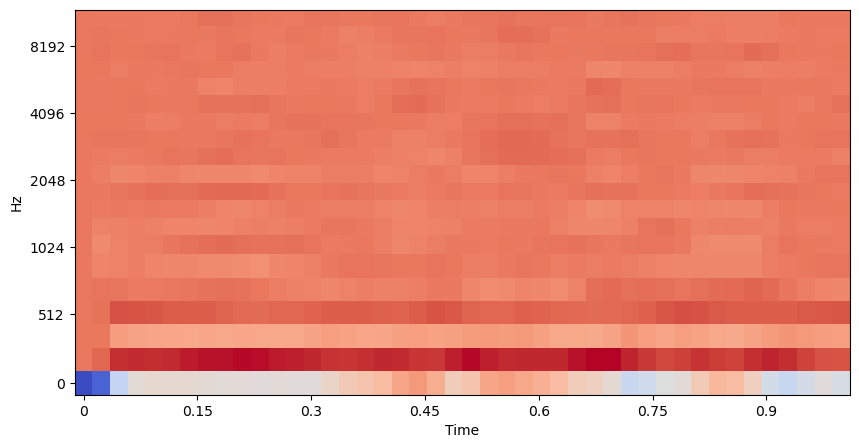

In [111]:
mfccs = librosa.feature.mfcc(y=y[0][0:22050], sr=sr[0], n_mfcc=20)
print(mfccs.shape)

plt.figure(figsize=(10, 5))
librosa.display.specshow(mfccs, sr=sr[0], x_axis='time',y_axis="mel")
plt.show()

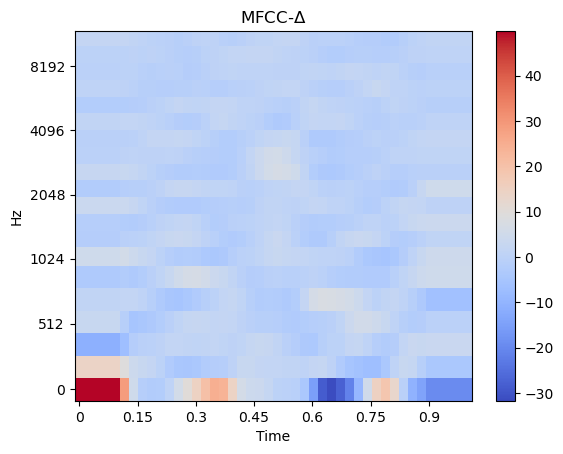

<Figure size 1000x500 with 0 Axes>

In [112]:
#Ydb.append(librosa.amplitude_to_db(abs(Y)))
librosa.display.specshow(mfcc_delta[0], sr=sr[0], x_axis="time", y_axis="mel")
plt.colorbar()
plt.title(r'MFCC-$\Delta$')
plt.figure(figsize=(10, 5))
plt.show()

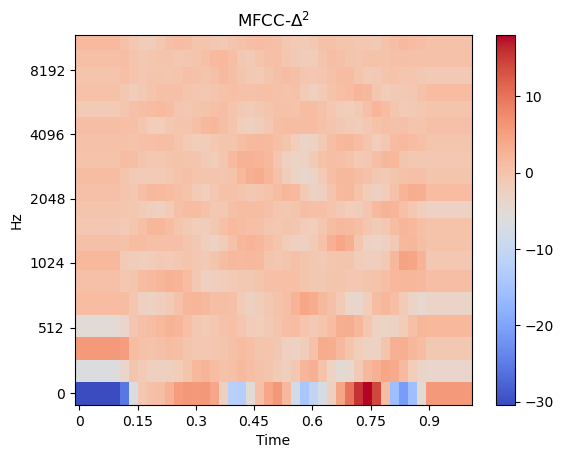

<Figure size 1400x500 with 0 Axes>

In [113]:
# MFCC Delta 2
librosa.display.specshow(mfcc_delta_2[0], sr=sr[0], x_axis="time", y_axis="mel")
plt.colorbar()
plt.title('MFCC-$\Delta^2$')
plt.figure(figsize=(14, 5))
plt.show()

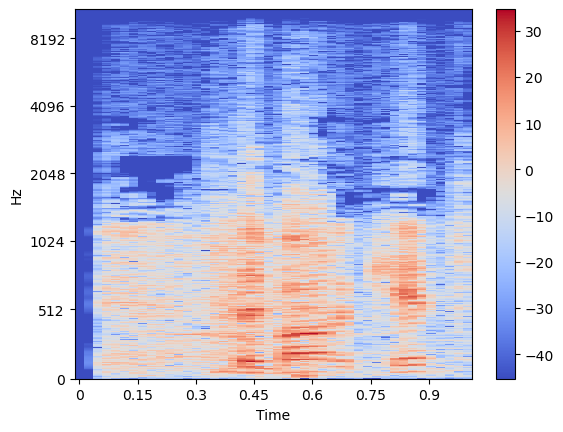

<Figure size 700x250 with 0 Axes>

In [114]:
# Power graph 

librosa.display.specshow(Ydb[0], sr=sr[0], x_axis="time", y_axis="mel")
plt.colorbar()
plt.figure(figsize=(7, 2.5))
plt.show()